## Determining Cluster

### Silhouette Score

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("pose_data_leg.csv")

In [ ]:
# Peak silhouette score = best k
# Elbow in inertia plot = stable number of clusters

In [6]:
# Clean frames
pivot_df = df.sort_values(['Frame', 'Name']).pivot(index='Frame', columns='Name')[['X', 'Y', 'Z']]
pivot_df.columns = [f"{coord}_{name}" for coord, name in pivot_df.columns]
pivot_df = pivot_df.dropna() 

In [7]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df)

In [8]:
# Compute silhouette scores for k = 2 to 9
s_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    labels = km.labels_
    score = silhouette_score(X_scaled, labels)
    s_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

k=2, Silhouette Score=0.4799
k=3, Silhouette Score=0.5535
k=4, Silhouette Score=0.5602
k=5, Silhouette Score=0.5658


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

k=6, Silhouette Score=0.5355
k=7, Silhouette Score=0.4727
k=8, Silhouette Score=0.4273
k=9, Silhouette Score=0.4343


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


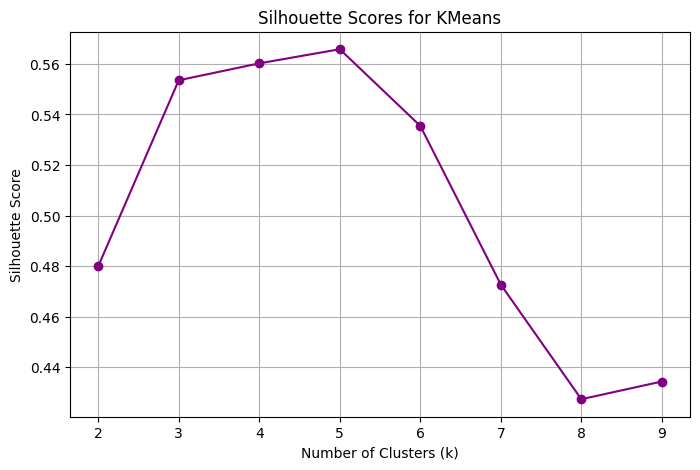

In [9]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, s_scores, marker='o', color='purple')
plt.title("Silhouette Scores for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

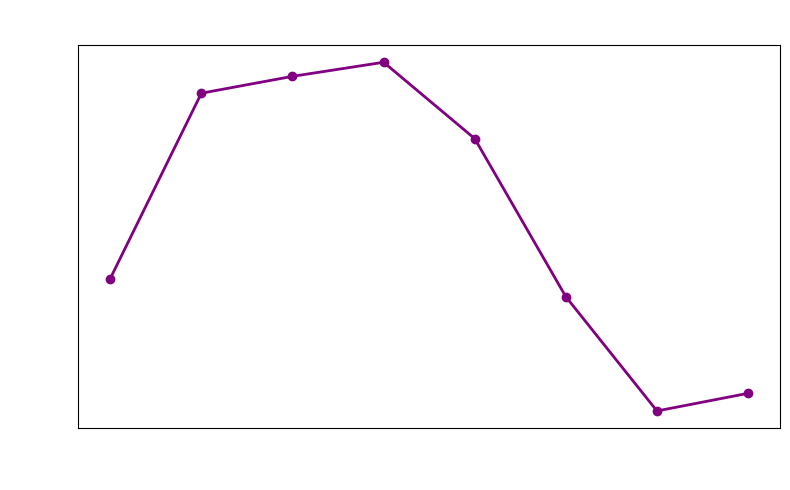

In [10]:
import matplotlib.pyplot as plt

# … (after computing k_range and s_scores) …

# 1. Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# 2. Plot
ax.plot(k_range, s_scores, marker='o', color='purple', linewidth=2)

# 3. Style text in white
ax.set_title("Silhouette Scores for KMeans", color='white', pad=15)
ax.set_xlabel("Number of Clusters (k)", color='white', labelpad=10)
ax.set_ylabel("Silhouette Score", color='white', labelpad=10)

# 4. Style ticks & grid
ax.tick_params(colors='white')  
ax.grid(True, color='white', alpha=0.3)

# 5. Make backgrounds transparent
fig.patch.set_alpha(0.0)     # Figure background
ax.patch.set_alpha(0.0)      # Axes background

# 6. Save to PNG with transparency
plt.tight_layout()
plt.savefig(
    "silhouette_scores.png",
    dpi=300,
    transparent=True,      # ensures figure and axes are transparent
    bbox_inches='tight'
)
plt.show()

In [65]:
import os
import matplotlib.pyplot as plt

# --- 1) Convert figure size from cm to inches ---
w_cm, h_cm = 31, 6
w_in, h_in = w_cm / 2.54, h_cm / 2.54

# --- 2) Prepare output directory ---
out_dir = "pose_KMeans"
os.makedirs(out_dir, exist_ok=True)

# --- 3) Line-only silhouette plot ---
fig, ax = plt.subplots(figsize=(w_in, h_in), facecolor='none')
ax.set_facecolor('none')

# Plot the silhouette scores line
ax.plot(k_range, s_scores, marker='o', color='purple', linewidth=2)

# White text, no grid or spines
ax.set_title("Silhouette Scores for KMeans", color='white', pad=15)
ax.set_xlabel("Number of Clusters (k)", color='white', labelpad=10)
ax.set_ylabel("Silhouette Score", color='white', labelpad=10)
ax.grid(False)
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('none')

# Transparent background
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Save
line_path = os.path.join(out_dir, "silhouette_line.png")
plt.tight_layout()
plt.savefig(line_path, dpi=300, transparent=True, bbox_inches='tight')
plt.close(fig)

# --- 4) Grid-only silhouette plot ---
fig, ax = plt.subplots(figsize=(w_in, h_in), facecolor='none')
ax.set_facecolor('none')

# Draw only the grid
ax.grid(True, color='white', alpha=0.3)

# Keep title and labels in white
ax.set_title("Silhouette Scores for KMeans", color='white', pad=15)
ax.set_xlabel("Number of Clusters (k)", color='white', labelpad=10)
ax.set_ylabel("Silhouette Score", color='white', labelpad=10)
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Transparent background
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Save
grid_path = os.path.join(out_dir, "silhouette_grid.png")
plt.tight_layout()
plt.savefig(grid_path, dpi=300, transparent=True, bbox_inches='tight')
plt.close(fig)

print(f"Saved line-only plot to {line_path}")
print(f"Saved grid-only plot to {grid_path}")

Saved line-only plot to pose_KMeans\silhouette_line.png
Saved grid-only plot to pose_KMeans\silhouette_grid.png


### WCSS Elbow + Silhouette

In [8]:
print(df[['X', 'Y', 'Z']].dtypes)
print(df[['X', 'Y', 'Z']].head(10))

# Convert X, Y, Z columns to numeric (non-convertible values become NaN)
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Z'] = pd.to_numeric(df['Z'], errors='coerce')

# Drop any rows with NaNs in XYZ
df_clean = df.dropna(subset=['X', 'Y', 'Z'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[['X', 'Y', 'Z']])

X    float64
Y    float64
Z    float64
dtype: object
          X         Y         Z
0  0.606007  0.363219 -0.013952
1  0.565625  0.354464  0.014128
2  0.606224  0.464390 -0.101418
3  0.537987  0.469040 -0.022855
4  0.612246  0.566767  0.057505
5  0.529596  0.577492  0.135722
6  0.608860  0.582691  0.070503
7  0.533878  0.597627  0.147343
8  0.625307  0.612209 -0.004993
9  0.509487  0.610795  0.056176


In [9]:
# Range of cluster numbers
k_range = range(2, 11)  # 2 to 10 clusters

# Empty lists to store results
wcss = []
silhouette_scores = []

In [10]:
# Loop through each k cluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    
    # WCSS: inertia_ is the WCSS
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    
    print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette Score={score:.4f}")

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=2: WCSS=7991.84, Silhouette Score=0.3591


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=3: WCSS=5642.15, Silhouette Score=0.3913


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=4: WCSS=4471.01, Silhouette Score=0.4166


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=5: WCSS=3653.78, Silhouette Score=0.4566


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=6: WCSS=3206.24, Silhouette Score=0.4458


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=7: WCSS=3035.02, Silhouette Score=0.4298


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=8: WCSS=2664.08, Silhouette Score=0.4559


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=9: WCSS=2194.05, Silhouette Score=0.4605


C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


k=10: WCSS=2010.69, Silhouette Score=0.3948


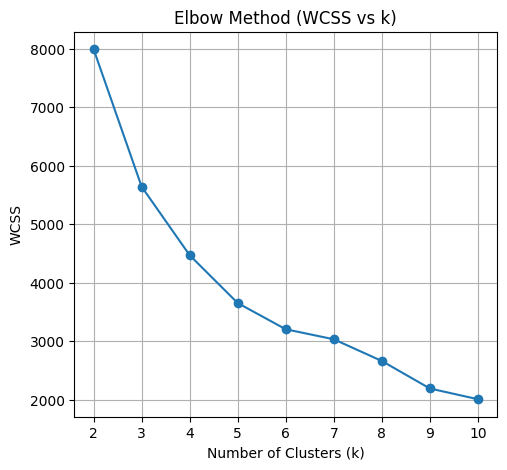

In [11]:
# Apply WCSS (Elbow)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method (WCSS vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)

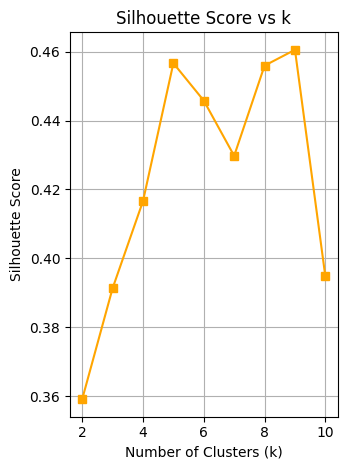

In [12]:
# Visualize Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='orange')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

## Comparative PCA vs t-SNE 

### Workflow 1: t-SNE + KMeans

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [14]:
pivot_df = df.sort_values(['Frame', 'Name']).pivot(index='Frame', columns='Name')[['X', 'Y', 'Z']]
pivot_df.columns = [f"{coord}_{name}" for coord, name in pivot_df.columns]
pivot_df = pivot_df.dropna()  # Remove frames with missing keypoints

In [15]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df)

In [16]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

In [17]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


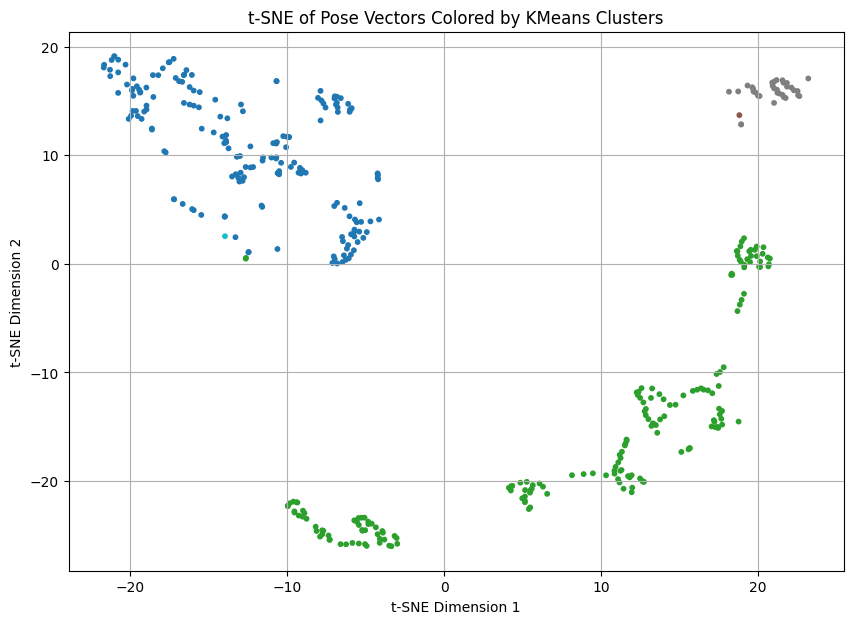

In [18]:
# Visualise
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title("t-SNE of Pose Vectors Colored by KMeans Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

### Workflow 2: PCA + t-SNE + KMeans

In [20]:
from sklearn.decomposition import PCA

In [20]:
pivot_df = df.sort_values(['Frame', 'Name']).pivot(index='Frame', columns='Name')[['X', 'Y', 'Z']]
pivot_df.columns = [f"{coord}_{name}" for coord, name in pivot_df.columns]
pivot_df = pivot_df.dropna()  # Remove frames with missing keypoints

In [21]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df)

In [22]:
# Apply PCA
pca = PCA(n_components=10, random_state=0) # Change from 30D into 10D
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0) # Plot in 2D
X_tsne = tsne.fit_transform(X_pca)

In [24]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0) # Determine clusters
cluster_labels = kmeans.fit_predict(X_scaled)

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


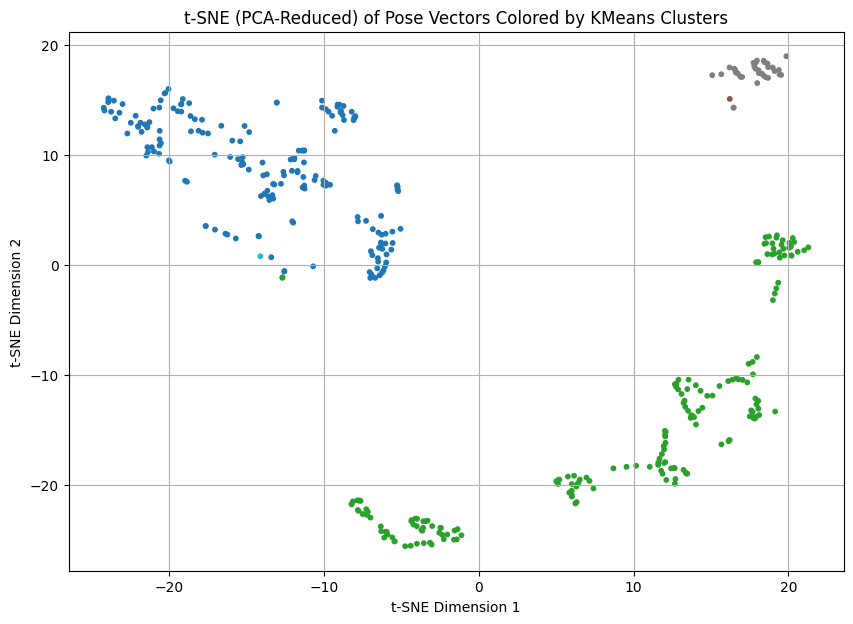

In [25]:
# Visualise
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.title("t-SNE (PCA-Reduced) of Pose Vectors Colored by KMeans Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

### Workflow 1: t-SNE + KMeans (with Feature Engineering)

In [26]:
# Speed
df = df.sort_values(['Name', 'Frame'])
df[['dX', 'dY', 'dZ']] = df.groupby('Name')[['X', 'Y', 'Z']].diff()
df['Speed'] = np.sqrt(df['dX']**2 + df['dY']**2 + df['dZ']**2)

In [27]:
# Vertical Movement and SD via agg()
frame_features = df.groupby('Frame').agg({
    'Speed': 'mean',
    'Y': ['mean', 'std'],
    'Z': ['mean', 'std']
})
frame_features.columns = ['Speed_mean', 'Y_mean', 'Y_std', 'Z_mean', 'Z_std']
frame_features = frame_features.dropna()

In [28]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(frame_features)

In [29]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

In [30]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


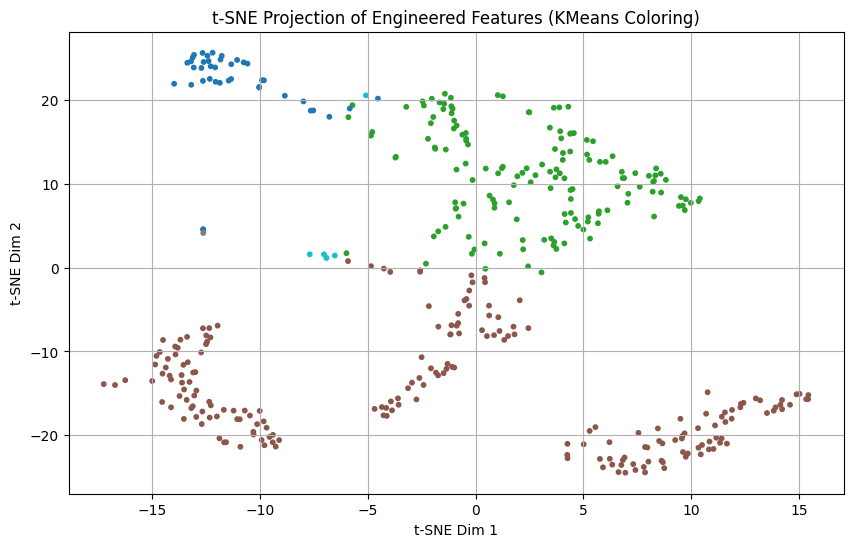

In [31]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("t-SNE Projection of Engineered Features (KMeans Coloring)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.show()

### Workflow 2: PCA + t-SNE + KMeans (with Feature Engineering)

In [32]:
# Apply PCA
pca = PCA(n_components=5, random_state=0)
X_pca = pca.fit_transform(X_scaled)

In [33]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

In [34]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)
frame_features['Cluster'] = labels

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


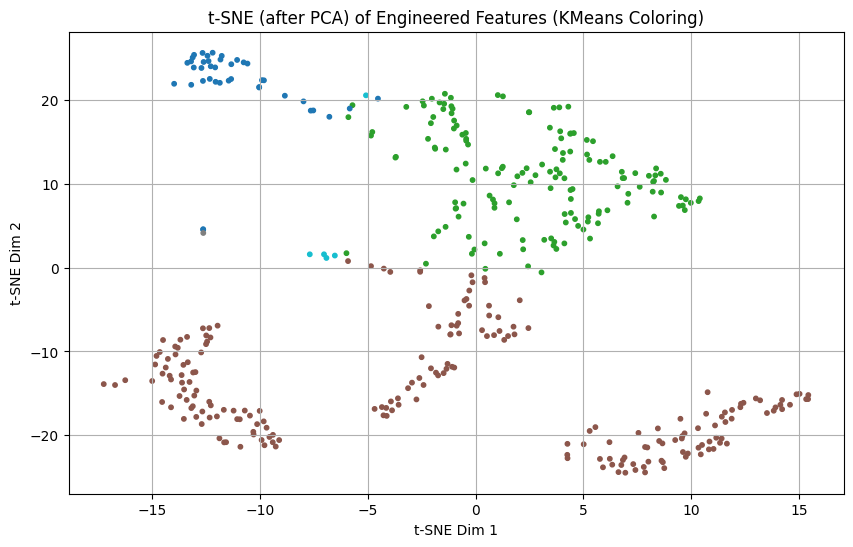

In [35]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title("t-SNE (after PCA) of Engineered Features (KMeans Coloring)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.show()

## Final Workflow

### Workflow Collective: PCA 5 + t-SNE + KMeans 5 (with Feature Engineering)

In [ ]:
# original feature engineering (speed, vertical movement, standard deviation)

In [22]:
# Speed
df = df.sort_values(['Name', 'Frame'])
df[['dX','dY','dZ']] = df.groupby('Name')[['X','Y','Z']].diff()
df['Speed'] = np.sqrt(df.dX**2 + df.dY**2 + df.dZ**2)

In [23]:
# added feature engineering (x_std, ankle distance)

In [24]:
# Vertical Movement and STD
frame_features = df.groupby('Frame').agg({
    'Speed':'mean',
    'Y':['mean','std'],
    'Z':['mean','std']
})
frame_features.columns = ['Speed_mean','Y_mean','Y_std','Z_mean','Z_std']

In [25]:
# Ankle distance
ank = df[df.Name.isin(['LEFT_ANKLE','RIGHT_ANKLE'])]
ank = ank.pivot(index='Frame', columns='Name', values=['X','Y','Z'])
ank.columns = [f"{axis}_{name}" for axis,name in ank.columns]
ank['AnkleDist'] = np.sqrt(
    (ank.X_LEFT_ANKLE - ank.X_RIGHT_ANKLE)**2 +
    (ank.Y_LEFT_ANKLE - ank.Y_RIGHT_ANKLE)**2 +
    (ank.Z_LEFT_ANKLE - ank.Z_RIGHT_ANKLE)**2
)

In [26]:
# Merge and drop incomplete frames
frame_features = frame_features.merge(
    ank['AnkleDist'], left_index=True, right_index=True
).dropna().reset_index(drop=True)

In [27]:
feature_cols = ['Speed_mean','Y_mean','Y_std','Z_mean','Z_std','AnkleDist']

In [28]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(frame_features[feature_cols])

In [29]:
# PCA
pca = PCA(n_components=5, random_state=0)
X_pca = pca.fit_transform(X_scaled)

In [30]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

In [31]:
# KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)
frame_features['Cluster'] = labels

C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VA\anaconda3\envs\bodylanguage\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [32]:
# Synthetic Augmentation of Cluster 2

In [33]:
# Parameters
noise_level = 0.1
N1 = 150  # number of synthetics for Cluster 1
N2 = 150  # number of synthetics for Cluster 2
N3 = 100  # number of synthetics for Cluster 3

In [34]:
# Synthetic for Cluster 1
cluster1_vec = frame_features.loc[frame_features.Cluster == 1, feature_cols].iloc[0].values
synthetic1 = np.array([
    cluster1_vec + np.random.normal(0, noise_level, size=cluster1_vec.shape)
    for _ in range(N1)
])
synt_df1 = pd.DataFrame(synthetic1, columns=feature_cols)
synt_df1['Cluster'] = 1

# Synthetic for Cluster 2
cluster2_vec = frame_features.loc[frame_features.Cluster == 2, feature_cols].iloc[0].values
synthetic2 = np.array([
    cluster2_vec + np.random.normal(0, noise_level, size=cluster2_vec.shape)
    for _ in range(N2)
])
synt_df2 = pd.DataFrame(synthetic2, columns=feature_cols)
synt_df2['Cluster'] = 2

# Synthetic for Cluster 3
cluster3_vec = frame_features.loc[frame_features.Cluster == 3, feature_cols].iloc[0].values
synthetic3 = np.array([
    cluster3_vec + np.random.normal(0, noise_level, size=cluster3_vec.shape)
    for _ in range(N3)
])
synt_df3 = pd.DataFrame(synthetic3, columns=feature_cols)
synt_df3['Cluster'] = 3

In [35]:
# Combine both synthetic DataFrames
synt_all = pd.concat([synt_df1, synt_df2, synt_df3], ignore_index=True)

In [36]:
# Include as data
augmented = pd.concat([frame_features, synt_all], ignore_index=True)

In [37]:
# Count frames
print("Cluster counts after augmentation:")
print(augmented['Cluster'].value_counts())

Cluster counts after augmentation:
Cluster
4    203
3    188
1    155
2    151
0    105
Name: count, dtype: int64


#### Cluster Profile

##### movement_map 
cluster 0 = stand,
cluster 1 = run,
cluster 2 = jump,
cluster 3 = walk,
cluster 4 = swing

In [38]:
# Mapping from filename to cluster ID
file_cluster_map = {
    "chrono_stand.csv": 0,
    "chrono_run.csv":   1,
    "chrono_jump.csv":  2,
    "chrono_walk.csv":  3,
    "chrono_swing.csv": 4,
}

# Read, tag, and collect
dfs = []
for fname, cluster_id in file_cluster_map.items():
    df = pd.read_csv(fname)
    df['Cluster'] = cluster_id
    dfs.append(df)

# Concatenate all into one master DataFrame
chrono_all = pd.concat(dfs, ignore_index=True)

# Save to CSV
chrono_all.to_csv("chrono_all.csv", index=False)

#### Visualise

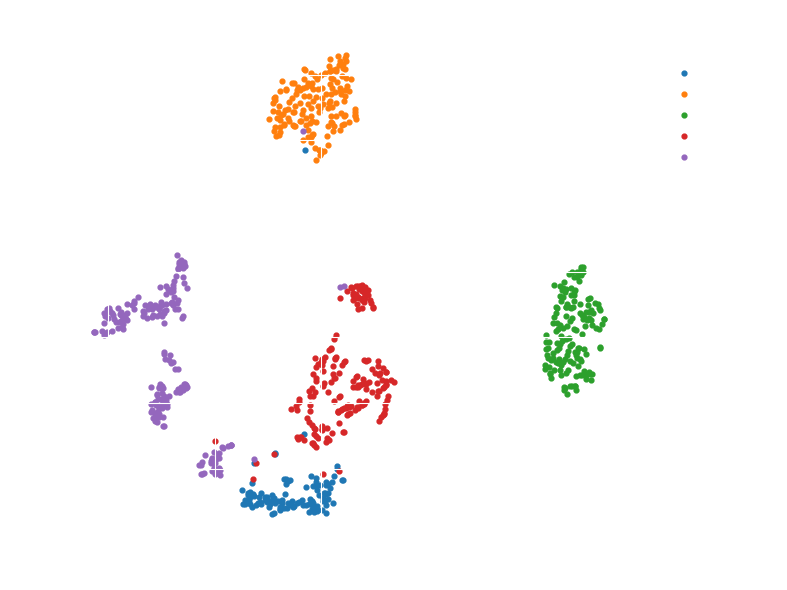

In [47]:
# Visualise
# Plot with transparent background
plt.figure(figsize=(8, 6), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

cmap = plt.get_cmap('tab10')
for cid in sorted(augmented['Cluster'].unique()):
    mask = (augmented['Cluster'] == cid)
    ax.scatter(
        X_tsne_aug[mask, 0],
        X_tsne_aug[mask, 1],
        s=12,
        color=cmap(cid),
        label=f"Cluster {cid}"
    )

ax.set_title("t-SNE", color='white')
ax.set_xlabel("t-SNE Dim 1", color='white')
ax.set_ylabel("t-SNE Dim 2", color='white')
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title="Cluster",
    facecolor='none',
    edgecolor='white',
    labelcolor='white'
)
ax.grid(True, color='white')
plt.tight_layout()

plt.savefig("plot_t-SNE.png", dpi=300, transparent=True)
plt.show()

In [49]:
import os
import matplotlib.pyplot as plt

# Ensure output folder exists
out_dir = "pose_KMeans"
os.makedirs(out_dir, exist_ok=True)

# --- Grid-only plot with title & labels but no inner grid ---
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
ax.set_facecolor('none')

# Turn off the inner grid
ax.grid(False)

# Set title & axis labels in white
ax.set_title("t-SNE", color='white', pad=15)
ax.set_xlabel("t-SNE Dim 1", color='white', labelpad=10)
ax.set_ylabel("t-SNE Dim 2", color='white', labelpad=10)

# Style tick labels in white
ax.tick_params(colors='white')

# Color the axes spines (borders) white so they show up
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
plt.savefig(
    os.path.join(out_dir, "grid.png"),
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)
plt.close(fig)

In [64]:
import os
import matplotlib.pyplot as plt

# --- Assumes you already have: ---
# augmented : DataFrame with a 'Cluster' column
# X_tsne_aug : numpy array of shape (n_frames, 2)

# 1) Define your bespoke cluster colors
cluster_colors = ['cyan', 'red', 'orange', 'magenta', '#00FF00']  # neon green

# 2) Prepare output folder
out_dir = "pose_KMeans"
os.makedirs(out_dir, exist_ok=True)

# --- 3) Points-only plot ---
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
ax.set_facecolor('none')

for cid in sorted(augmented['Cluster'].unique()):
    mask = (augmented['Cluster'] == cid)
    ax.scatter(
        X_tsne_aug[mask, 0],
        X_tsne_aug[mask, 1],
        s=12,
        color=cluster_colors[cid],
        label=f"Cluster {cid}"
    )

# Remove grids, axes, and legend for a clean points-only image
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")

# Hide all spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
points_path = os.path.join(out_dir, "points.png")
plt.savefig(points_path, dpi=300, transparent=True, bbox_inches='tight')
plt.close(fig)

# --- 4) Grid-only plot ---
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
ax.set_facecolor('none')

# Show grid and axes labels/title, no points
ax.grid(True, color='white', linestyle='-', linewidth=0.5, alpha=0.7)

ax.set_title("t-SNE", color='white')
ax.set_xlabel("t-SNE Dim 1", color='white')
ax.set_ylabel("t-SNE Dim 2", color='white')

ax.tick_params(colors='white')

# Color the axes spines white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
grid_path = os.path.join(out_dir, "grid.png")
plt.savefig(grid_path, dpi=300, transparent=True, bbox_inches='tight')
plt.close(fig)

print(f"Saved points-only plot to {points_path}")
print(f"Saved grid-only plot   to {grid_path}")

Saved points-only plot to pose_KMeans\points.png
Saved grid-only plot   to pose_KMeans\grid.png


In [40]:
# Post-augmentation
X_aug = augmented[feature_cols].values
X_aug_scaled = StandardScaler().fit_transform(X_aug)

In [41]:
# PCA on augmented data
pca_aug = PCA(n_components=5, random_state=0)
X_pca_aug = pca_aug.fit_transform(X_aug_scaled)

In [42]:
# t-SNE
tsne_aug = TSNE(
    n_components=2,
    perplexity=30,          # manual choice
    early_exaggeration=12.0,
    learning_rate=200,
    init='pca',
    random_state=0
)
X_tsne_aug = tsne_aug.fit_transform(X_pca_aug)

### Perplexity

In [43]:
# Recompute PCA on augmented data
X_aug = augmented[feature_cols].values
X_aug_scaled = StandardScaler().fit_transform(X_aug)
pca_aug = PCA(n_components=5, random_state=0)
X_pca_aug = pca_aug.fit_transform(X_aug_scaled)

In [44]:
# Visualisation

In [45]:
clusters = augmented['Cluster'].values
cluster_colors = {
    0: 'orange',
    1: 'cyan',
    2: 'red',
    3: 'lime',    # neon green
    4: 'magenta'
}

# White‐on‐transparent styling
plt.rcParams.update({
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'grid.color': 'white'
})

output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

perplexities = [5, 15, 30, 50, 75]

for perp in perplexities:
    # Compute t-SNE
    X_tsne_var = TSNE(
        n_components=2,
        perplexity=perp,
        early_exaggeration=12.0,
        learning_rate=200,
        init='pca',
        random_state=0
    ).fit_transform(X_pca_aug)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
    ax.set_facecolor('none')

    for cid, color in cluster_colors.items():
        mask = clusters == cid
        ax.scatter(
            X_tsne_var[mask, 0],
            X_tsne_var[mask, 1],
            s=10,
            color=color,
            label=f"Cluster {cid}"
        )

    # Title and labels (no extra indent!)
    ax.set_title(f"KMeans Plot (Perplexity = {perp})", color='white')
    ax.set_xlabel("KMeans Dimension 1")
    ax.set_ylabel("KMeans Dimension 2")
    ax.grid(True)

    # Legend outside
    ax.legend(
        title="Cluster",
        loc='upper left',
        bbox_to_anchor=(1, 1),
        frameon=False
    )

    # Save file
    filename = os.path.join(output_dir, f"pose clustering_perplexity{perp}.png")
    fig.savefig(filename, dpi=300, transparent=True)
    plt.close(fig)

print("Saved individual perplexity plots in:", output_dir)

Saved individual perplexity plots in: plots


In [46]:
print(frame_features.groupby('Cluster')[feature_cols].mean().loc[[0,1,2,3,4]])

         Speed_mean    Y_mean     Y_std    Z_mean     Z_std  AnkleDist
Cluster                                                               
0          0.051260  0.764325  0.155210 -0.194040  0.141822   0.232942
1          1.127090  0.883565  0.161639 -0.164866  0.234009   0.113968
2          1.831014 -0.442649  0.877274  0.730758  0.530947   0.429312
3          0.081160  0.718904  0.128485 -0.100507  0.103263   0.105877
4          0.026815  0.757262  0.170506 -0.355936  0.209808   0.192416


## Visualisation

### Initial test

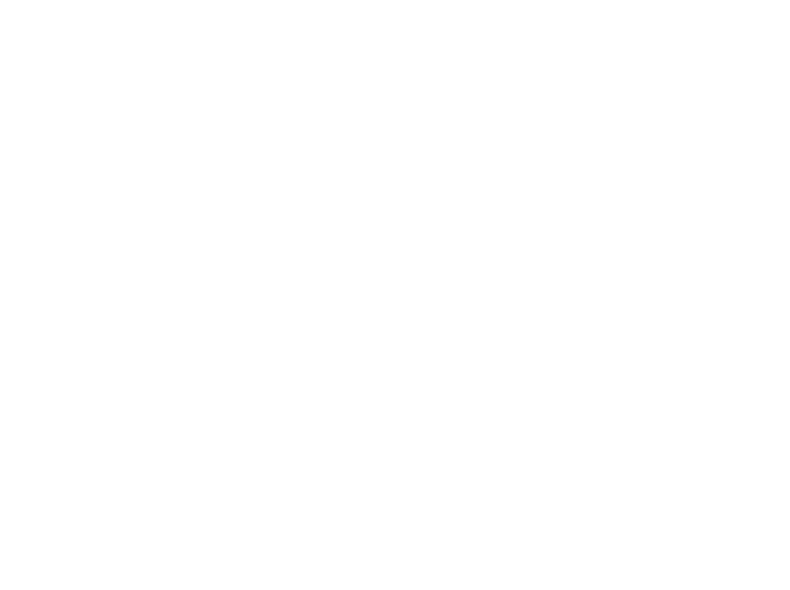

Saved figure to pose_KMeans\tsne_with_skin_adjusted_full.png


In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1) Load and preprocess CSV
df = pd.read_csv('pose_data_leg.csv')
df = df.sort_values(['Name', 'Frame'])
df[['dX', 'dY', 'dZ']] = df.groupby('Name')[['X', 'Y', 'Z']].diff()
df['Speed'] = np.sqrt(df['dX']**2 + df['dY']**2 + df['dZ']**2)

# 2) Aggregate frame-level features
frame_features = df.groupby('Frame').agg({
    'Speed': 'mean',
    'Y': ['mean', 'std'],
    'Z': ['mean', 'std']
})
frame_features.columns = ['Speed_mean', 'Y_mean', 'Y_std', 'Z_mean', 'Z_std']
frame_features = frame_features.dropna()

# 3) PCA → t-SNE embedding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(frame_features)
pca = PCA(n_components=5, random_state=0)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_pca)

# 4) Pivot XY keypoints per frame
pivot = df.pivot_table(index='Frame', columns='Name', values=['X', 'Y'])
pivot.columns = [f"{coord}_{name}" for coord, name in pivot.columns]
pivot_df = pivot.dropna()

# 5) Merge embeddings & keypoints
tsne_df = pd.DataFrame(X_tsne, index=frame_features.index, columns=['tsne1', 'tsne2'])
embed_df = pivot_df.join(tsne_df, how='inner')

# 6) Define leg keypoints explicitly
left_kps = ['LEFT_HIP', 'LEFT_KNEE', 'LEFT_ANKLE', 'LEFT_HEEL', 'LEFT_FOOT_INDEX']
right_kps = ['RIGHT_HIP', 'RIGHT_KNEE', 'RIGHT_ANKLE', 'RIGHT_HEEL', 'RIGHT_FOOT_INDEX']

# 7) Compute global scale for shapes
xmin, xmax = embed_df['tsne1'].min(), embed_df['tsne1'].max()
ymin, ymax = embed_df['tsne2'].min(), embed_df['tsne2'].max()
trange = max(xmax - xmin, ymax - ymin)
shape_scale = 0.1 * trange  # adjust factor as needed

# 8) Prepare output directory
out_dir = "pose_KMeans"
os.makedirs(out_dir, exist_ok=True)

# 9) Plot t-SNE with generated skins (5% fill, 80% lines @ 0.1 linewidth)
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
ax.set_facecolor('none')

for frame, row in embed_df.iterrows():
    x0, y0 = row['tsne1'], row['tsne2']
    # Left and right leg polylines
    L = np.vstack([[row[f"X_{kp}"], row[f"Y_{kp}"]] for kp in left_kps])
    R = np.vstack([[row[f"X_{kp}"], row[f"Y_{kp}"]] for kp in right_kps])
    pts = np.vstack([L, R])
    center = pts.mean(axis=0)
    size = max(pts[:, 0].ptp(), pts[:, 1].ptp())
    scale = shape_scale / size if size else 1.0
    L2 = (L - center) * scale + np.array([x0, y0])
    R2 = (R - center) * scale + np.array([x0, y0])
    # Draw skeleton (boundaries + tween)
    segments = [L2, R2] + [(1-t)*L2 + t*R2 for t in np.linspace(0, 1, 7)[1:-1]]
    for seg in segments:
        ax.plot(seg[:, 0], seg[:, 1], color='white', alpha=0.8, linewidth=0.1)
    # Fill skin
    boundary = np.vstack([L2, R2[::-1]])
    poly = Polygon(boundary, closed=True, facecolor='white', alpha=0.05, edgecolor=None)
    ax.add_patch(poly)

# 10) Style & save
ax.set_title("t-SNE Embedding with Generated Skin Overlays", color='white')
ax.set_xlabel("t-SNE Dim 1", color='white')
ax.set_ylabel("t-SNE Dim 2", color='white')
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
output_path = os.path.join(out_dir, "tsne_with_skin_adjusted_full.png")
plt.savefig(output_path, dpi=300, transparent=True, bbox_inches='tight')
plt.show()

print(f"Saved figure to {output_path}")